In [1]:
import pandas as pd
train_data=pd.read_csv("data/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
test_data = pd.read_csv("data/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [4]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=1)
    model.fit(X_train, y_train)
    
    preds_train = model.predict(X_train)
    preds_valid = model.predict(X_valid)
    return accuracy_score(y_valid, preds_valid),accuracy_score(y_train,preds_train)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.impute import SimpleImputer

#given a feature list, return the score
def score_features(features,data_size):
    train_data_subset = train_data.iloc[0:data_size][:]
    y = train_data_subset["Survived"]    
    X = pd.get_dummies(train_data_subset[features])

    averageScore=0
    train_X, val_X, train_y, val_y = train_test_split(X, y, train_size=0.7, random_state=0)

    # Imputation
    my_imputer = SimpleImputer()
    imputed_X_train = pd.DataFrame(my_imputer.fit_transform(train_X))
    imputed_X_valid = pd.DataFrame(my_imputer.transform(val_X))

    # Imputation removed column names; put them back
    imputed_X_train.columns = train_X.columns
    imputed_X_valid.columns = val_X.columns        

    score_valid,score_train=score_dataset(imputed_X_train,imputed_X_valid,train_y,val_y)
    averageScore+=score_valid
    #print("Training data size: " + str(data_size) + ", training Score: " +str(score_train) + ", validation score: "+ str(score_valid))

    return score_valid,score_train

In [14]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]

train_data_full = train_data.shape[0]

list_data_size = []
list_train_socre  = []
list_validation_score = []

for size in range(50,train_data_full,50):
    list_data_size.append(size)
    score_valid,score_train = score_features(features,size)
    list_train_socre.append(score_train)
    list_validation_score.append(score_valid)

print("- Data size: ", list_data_size)
print("- Training score: ", list_train_socre)
print("- Validation score: ", list_validation_score)

- Data size:  [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850]
- Training score:  [1.0, 1.0, 1.0, 1.0, 0.9771428571428571, 0.9714285714285714, 0.9754098360655737, 0.9678571428571429, 0.9682539682539683, 0.9457142857142857, 0.9584415584415584, 0.9476190476190476, 0.9449339207048458, 0.9447852760736196, 0.9485714285714286, 0.9553571428571429, 0.9428571428571428]
- Validation score:  [0.6, 0.8, 0.7333333333333333, 0.75, 0.7866666666666666, 0.6555555555555556, 0.7641509433962265, 0.8, 0.8296296296296296, 0.8, 0.806060606060606, 0.8166666666666667, 0.7959183673469388, 0.8293838862559242, 0.8044444444444444, 0.7916666666666666, 0.8549019607843137]


Text(0.5, 0, 'Data size')

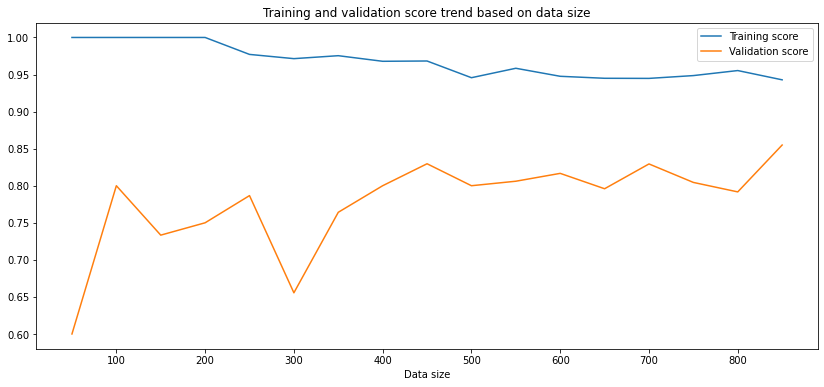

In [22]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(14,6))
plt.title("Training and validation score trend based on data size")
sns.lineplot(y=list_train_socre,x=list_data_size,label="Training score")
sns.lineplot(y=list_validation_score,x=list_data_size, label="Validation score")
plt.xlabel("Data size")